In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

In [3]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")

# ----------------------------
# Data Loading & Preprocessing
# ----------------------------
df = pd.read_csv("bank_preprocessed.csv")

# Ensure all data is numeric and drop rows with missing values
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=['y']).values
y = df['y'].values

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# ----------------------------
# Model Selection and Evaluation
# ----------------------------
# We'll evaluate a range of k values for KNN
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []
test_logloss = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Training Accuracy
    y_train_pred = knn.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    
    # Testing Accuracy
    y_test_pred = knn.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Log Loss (requires predict_proba)
    y_test_proba = knn.predict_proba(X_test)
    test_logloss.append(log_loss(y_test, y_test_proba))

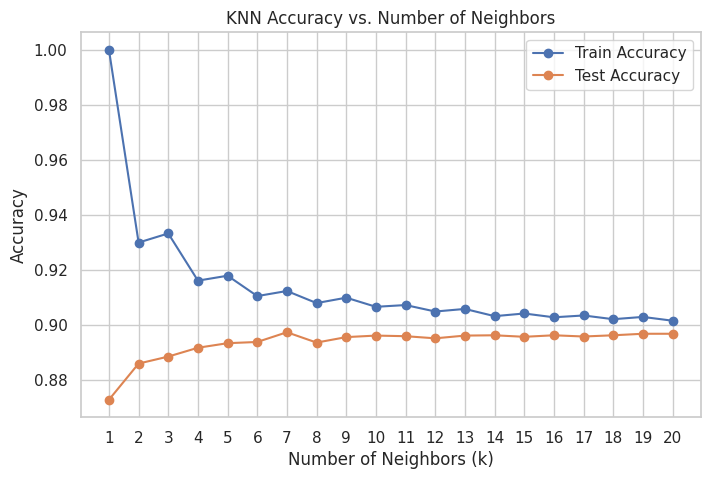

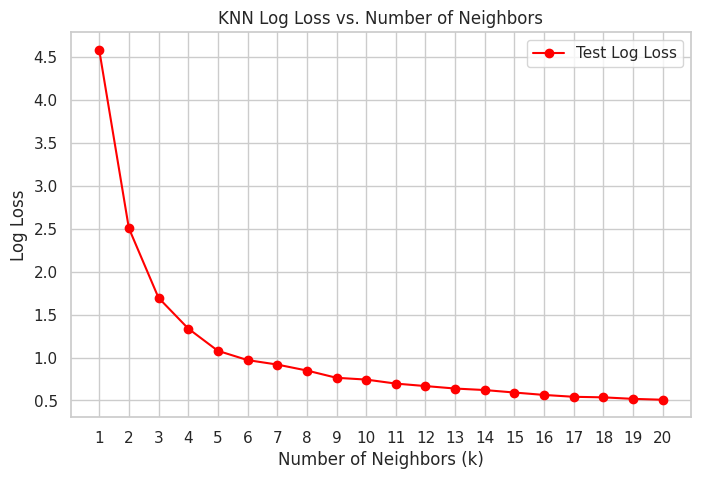

In [5]:
# Plot Accuracy vs. Number of Neighbors
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(k_values, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. Number of Neighbors")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Plot Log Loss vs. Number of Neighbors
plt.figure(figsize=(8, 5))
plt.plot(k_values, test_logloss, label="Test Log Loss", marker='o', color='red')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Log Loss")
plt.title("KNN Log Loss vs. Number of Neighbors")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

Best k based on Test Accuracy: 7

Final KNN Accuracy with k=7: 0.8973

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.64      0.34      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



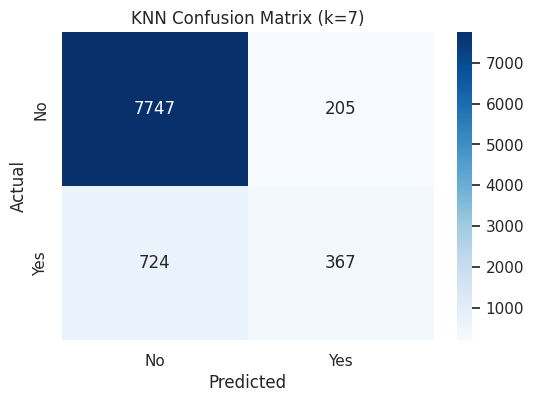

In [6]:
# ----------------------------
# Select the best k (highest test accuracy)
# ----------------------------
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k based on Test Accuracy: {best_k}")

# Train final KNN with best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_best)
print(f"\nFinal KNN Accuracy with k={best_k}: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.show()
